In [1]:
import os
import pandas as pd
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset
from torch.utils.data.dataloader import default_collate
import torchvision.transforms as transforms
from torch.utils.data import DataLoader 
#from helpers import visualize
%matplotlib inline

In [2]:
def visualize(input_arr,labels,num_imgs=9):
    plot_size=int(np.ceil(num_imgs/4))
    fig = plt.figure(figsize=(12,12))
    if len(input_arr.shape)==4:
        num_imgs=input_arr.shape[0]
    else:
        num_imgs=1
        input_arr=np.expand_dims(input_arr,axis=0)
        labels=[labels]
    for i in range(num_imgs):
      plt.subplot(4,plot_size,i+1)
      plt.tight_layout()
      img = input_arr[i]

      img = np.rollaxis(img,0,3)
      plt.imshow(img, interpolation='none')
      plt.title("class_label: {}".format(labels[i]))
      plt.xticks([])
      plt.yticks([])

In [3]:
class DatasetLoader(Dataset):
    """ Dataset Class Wrapper """

    def __init__(self, root_path, data_dir, annotation_file,data_type='train', \
                 data_transform=None,label_transform=None):
        """
        Args:
            root_path (string):  the parent folder path
            annotation_file (string):  csv/txt file which has the 
                                        dataset labels
            data_type(string): the type of data-train,val,test
            data_transform: The trasforms to apply to data
            label_transform: The transforms to apply to label

        """
        
        self.data_path = os.path.join(root_path,data_dir,data_type)
        self.label_path = os.path.join(root_path,annotation_file)
        self.data_transform = data_transform
        self._load_data()

    def _load_data(self):
        '''
        function to load the data in the format of [[img_name_1,label_1],
        [img_name_2,label_2],.....[img_name_n,label_n]]
        '''
        self.labels = pd.read_csv(self.label_path)
        
        self.loaded_data = []
        for i in range(self.labels.shape[0]):
            img_name = os.path.join(self.data_path, self.labels['img_names'][i])
            label = self.labels['labels'][i]
            self.loaded_data.append((img_name,label))

    def __len__(self):
        return len(self.loaded_data)

    def __getitem__(self, idx):

        idx = idx % len(self.loaded_data)
       
        img_name,label = self.loaded_data[idx]  
        
        img = Image.open(img_name)

        img_ = self.data_transform(img.copy())
            
        return img_,label

In [4]:
root_path=r'/home/shubhamp/Downloads/dataloadersPyTorch'
data_dir='/home/shubhamp/Downloads/dataloadersPyTorch/dogsvscatDataset'
annotation_file='/home/shubhamp/Downloads/dataloadersPyTorch/train_labels_mini.csv'

In [5]:
# no transformation
transform_tr=transforms.Compose([transforms.Resize((128,128)),
                                        transforms.ToTensor()])
transform_te=transforms.Compose([transforms.Resize((128,128)),
                                        transforms.ToTensor()])

In [6]:
training_dataset=DatasetLoader(root_path,data_dir,annotation_file,data_type='train',\
                          data_transform=transform_tr)
print('length of dataset: ', len(training_dataset))

length of dataset:  400


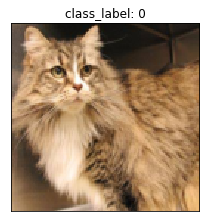

In [7]:
img,label=training_dataset[100]
visualize(img.numpy(),label,num_imgs=1)

In [11]:
train_dataloader = DataLoader(training_dataset, batch_size=12, shuffle=True)

In [14]:
data,label=next(iter(train_dataloader))

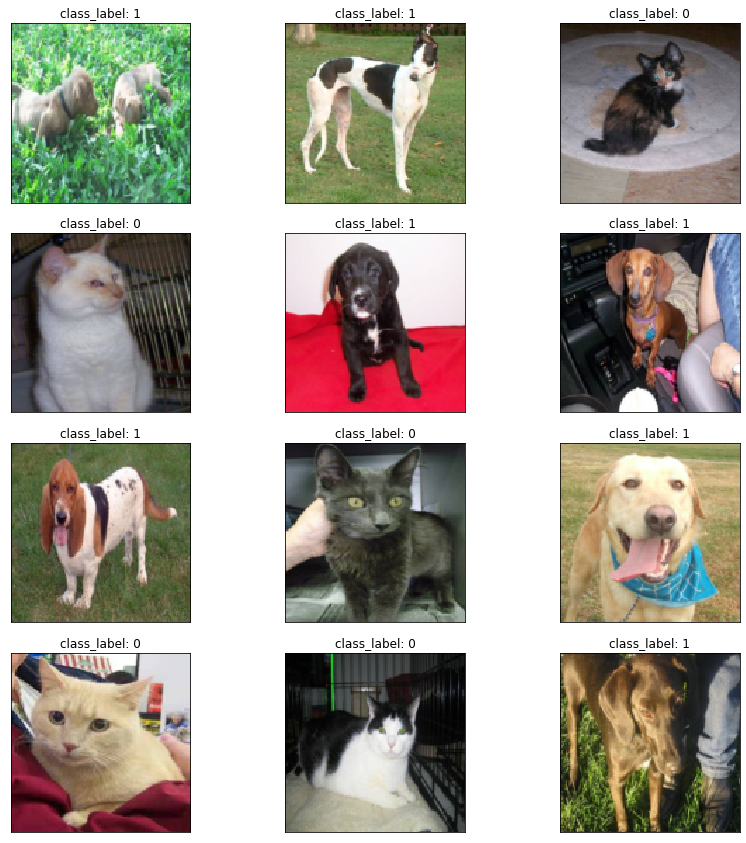

In [15]:
visualize(data.numpy(),label,num_imgs=12)

**Transformation Compose**

In [16]:
t1=transforms.RandomPerspective(distortion_scale=0.4, p=1.0)
t2=transforms.RandomCrop(96)
transform_tr=transforms.Compose([transforms.Resize((128,128)),
                                        transforms.ToTensor(),t2,t1])

In [17]:
training_dataset=DatasetLoader(root_path,data_dir,annotation_file,data_type='train',\
                          data_transform=transform_tr)
print('length of dataset: ', len(training_dataset))

length of dataset:  400


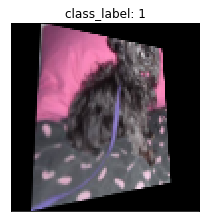

In [19]:
img,label=training_dataset[1000]
visualize(img.numpy(),label,num_imgs=1)

In [20]:
train_dataloader = DataLoader(training_dataset, batch_size=12, shuffle=True)
print(len(train_dataloader))

34


In [21]:
data,label=next(iter(train_dataloader))
print(data.shape)

torch.Size([12, 3, 96, 96])


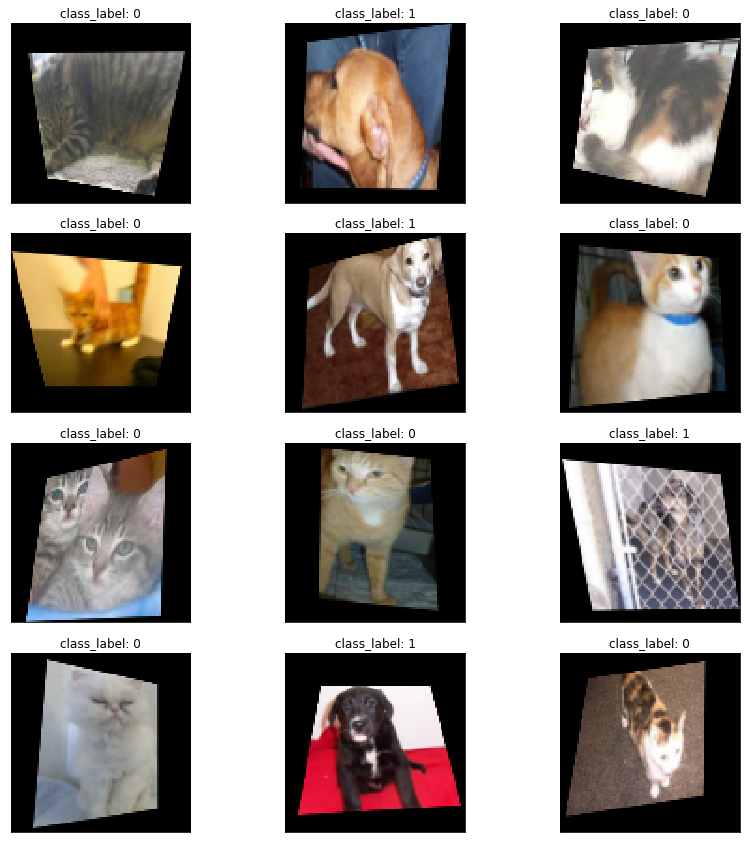

In [22]:
visualize(data.numpy(),label,num_imgs=12)